In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import make_scorer, accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN, RandomOverSampler
from imblearn.pipeline import Pipeline
from data_setup import integer_mapping, integer_training_setup, oneHotEncoder_setup

## Data Overview

In [2]:
df = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')
df

buying  maint  doors persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]

In [3]:
df = integer_mapping(df)
df

buying  maint  doors  persons  lug_boot  safety  class
0          4      4      2        2         1       1  unacc
1          4      4      2        2         1       2  unacc
2          4      4      2        2         1       3  unacc
3          4      4      2        2         2       1  unacc
4          4      4      2        2         2       2  unacc
...      ...    ...    ...      ...       ...     ...    ...
1723       1      1      5        5         2       2   good
1724       1      1      5        5         2       3  vgood
1725       1      1      5        5         3       1  unacc
1726       1      1      5        5         3       2   good
1727       1      1      5        5         3       3  vgood

[1728 rows x 7 columns]

In [4]:
df.dtypes

buying       int64
maint        int64
doors        int64
persons      int64
lug_boot     int64
safety       int64
class       object
dtype: object

In [5]:
df.describe()

buying        maint        doors      persons     lug_boot  \
count  1728.000000  1728.000000  1728.000000  1728.000000  1728.000000   
mean      2.500000     2.500000     3.500000     3.666667     2.000000   
std       1.118358     1.118358     1.118358     1.247580     0.816733   
min       1.000000     1.000000     2.000000     2.000000     1.000000   
25%       1.750000     1.750000     2.750000     2.000000     1.000000   
50%       2.500000     2.500000     3.500000     4.000000     2.000000   
75%       3.250000     3.250000     4.250000     5.000000     3.000000   
max       4.000000     4.000000     5.000000     5.000000     3.000000   

            safety  
count  1728.000000  
mean      2.000000  
std       0.816733  
min       1.000000  
25%       1.000000  
50%       2.000000  
75%       3.000000  
max       3.000000

In [6]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [7]:
df.groupby('class').size()

class
acc       384
good       69
unacc    1210
vgood      65
dtype: int64

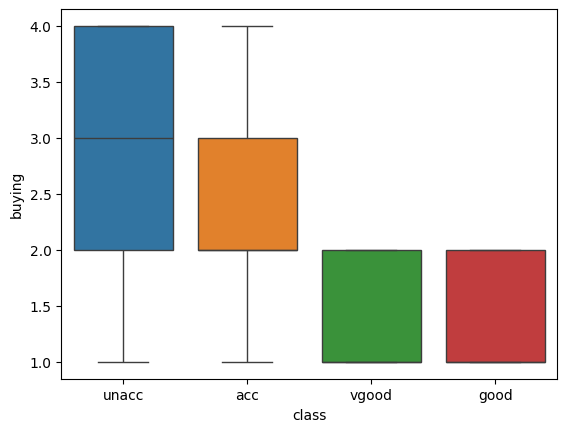

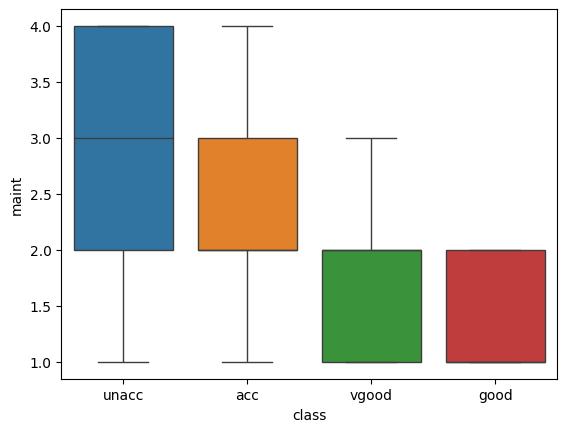

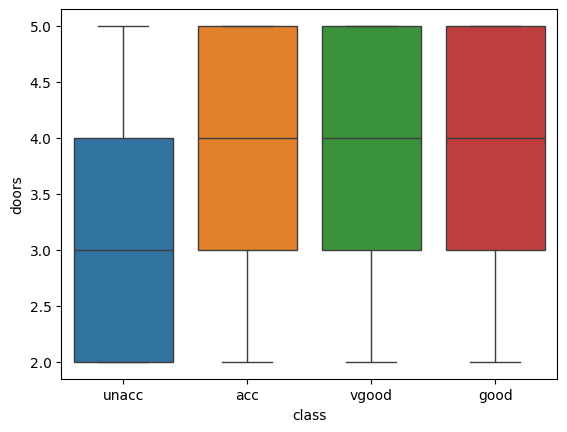

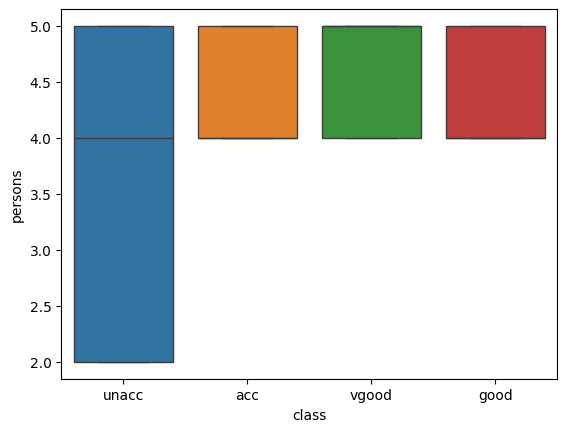

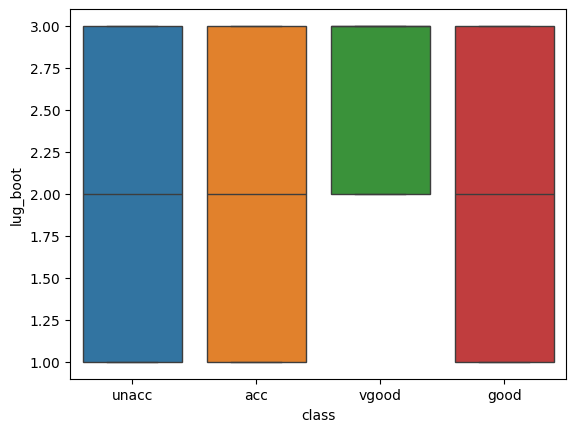

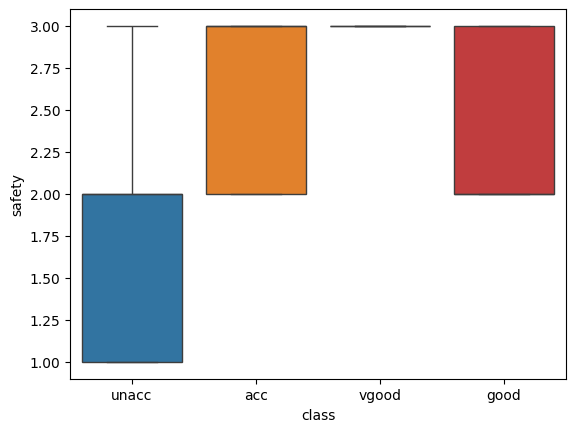

In [8]:
for i in df.columns[:-1]:
    sns.boxplot(x='class',y=i,data=df,hue='class')
    plt.show()

In [9]:
for i in df.columns[:-1]:
    fig = px.box(df,x='class',y=i,color='class')
    fig.show()

## Integer Mapping Decision Tree Classifier

In [10]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=302)

# Fit the model on the training data
X_train, X_test, y_train, y_test = integer_training_setup(df)

model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9826589595375722
Classification Report:
               precision    recall  f1-score   support

         acc       1.00      0.94      0.97        72
        good       0.86      0.92      0.89        13
       unacc       0.98      1.00      0.99       246
       vgood       1.00      0.93      0.97        15

    accuracy                           0.98       346
   macro avg       0.96      0.95      0.95       346
weighted avg       0.98      0.98      0.98       346



In [11]:
y_train_pred = model.predict(X_train)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_train, y_train_pred)
report = classification_report(y_train, y_train_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         acc       1.00      1.00      1.00       312
        good       1.00      1.00      1.00        56
       unacc       1.00      1.00      1.00       964
       vgood       1.00      1.00      1.00        50

    accuracy                           1.00      1382
   macro avg       1.00      1.00      1.00      1382
weighted avg       1.00      1.00      1.00      1382



In [12]:
from sklearn import tree
plt.figure(figsize=(40,30), dpi=400)
tree.plot_tree(model,feature_names=list(df.columns[:-1]),class_names=['acc','good','unacc','vgood'],filled=True)
plt.show()

In [13]:
from sklearn import tree
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_5 <= 1.50
|   |--- class: unacc
|--- feature_5 >  1.50
|   |--- feature_3 <= 3.00
|   |   |--- class: unacc
|   |--- feature_3 >  3.00
|   |   |--- feature_0 <= 2.50
|   |   |   |--- feature_1 <= 2.50
|   |   |   |   |--- feature_5 <= 2.50
|   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |   |   |--- feature_3 <= 4.50
|   |   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |   |   |--- feature_3 >  4.50
|   |   |   |   |   |   |   |   |--- class: unacc
|   |   |   |   |   |   |--- feature_2 >  2.50
|   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |   |   |   |--- feature_4 <= 2.50
|   |   |   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |   |   |   |--- feature_4 >  2.50
|   |   |   |   |   |   |   |   |   |--- class: good
|   |   | 

## OneHot Encoder Decision Tree Classifier

In [14]:
df_oneHot = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

In [15]:
X_train, X_test, y_train, y_test = oneHotEncoder_setup(df_oneHot)

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=302)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9826589595375722
Classification Report:
               precision    recall  f1-score   support

         acc       0.97      0.97      0.97        72
        good       0.86      0.92      0.89        13
       unacc       0.99      0.99      0.99       246
       vgood       1.00      0.93      0.97        15

    accuracy                           0.98       346
   macro avg       0.96      0.96      0.95       346
weighted avg       0.98      0.98      0.98       346



In [16]:
y_train_pred = model.predict(X_train)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_train, y_train_pred)
report = classification_report(y_train, y_train_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         acc       1.00      1.00      1.00       312
        good       1.00      1.00      1.00        56
       unacc       1.00      1.00      1.00       964
       vgood       1.00      1.00      1.00        50

    accuracy                           1.00      1382
   macro avg       1.00      1.00      1.00      1382
weighted avg       1.00      1.00      1.00      1382



## Integer Mapping Random Forest Classifier

In [17]:
X_train, X_test, y_train, y_test = integer_training_setup(df)

rfc_model = RandomForestClassifier(n_estimators=100, random_state=302)
rfc_model.fit(X_train, y_train)
rfc_y_pred = rfc_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, rfc_y_pred)
report = classification_report(y_test, rfc_y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9797687861271677
Classification Report:
               precision    recall  f1-score   support

         acc       0.93      0.99      0.96        72
        good       0.93      1.00      0.96        13
       unacc       1.00      0.98      0.99       246
       vgood       1.00      1.00      1.00        15

    accuracy                           0.98       346
   macro avg       0.96      0.99      0.98       346
weighted avg       0.98      0.98      0.98       346



In [18]:
y_train_pred = rfc_model.predict(X_train)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_train, y_train_pred)
report = classification_report(y_train, y_train_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         acc       1.00      1.00      1.00       312
        good       1.00      1.00      1.00        56
       unacc       1.00      1.00      1.00       964
       vgood       1.00      1.00      1.00        50

    accuracy                           1.00      1382
   macro avg       1.00      1.00      1.00      1382
weighted avg       1.00      1.00      1.00      1382



## OneHot Encoder Random Forest Classifier

In [19]:
X_train, X_test, y_train, y_test = oneHotEncoder_setup(df_oneHot)

rf_model = RandomForestClassifier(n_estimators=100, random_state=302)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, rf_y_pred)
report = classification_report(y_test, rf_y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.953757225433526
Classification Report:
               precision    recall  f1-score   support

         acc       0.86      0.93      0.89        72
        good       0.79      0.85      0.81        13
       unacc       0.99      0.97      0.98       246
       vgood       1.00      0.93      0.97        15

    accuracy                           0.95       346
   macro avg       0.91      0.92      0.91       346
weighted avg       0.96      0.95      0.95       346



In [20]:
y_train_pred = rf_model.predict(X_train)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_train, y_train_pred)
report = classification_report(y_train, y_train_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         acc       1.00      1.00      1.00       312
        good       1.00      1.00      1.00        56
       unacc       1.00      1.00      1.00       964
       vgood       1.00      1.00      1.00        50

    accuracy                           1.00      1382
   macro avg       1.00      1.00      1.00      1382
weighted avg       1.00      1.00      1.00      1382



##  Integer Mapping - K-Nearest Neighbor Classifier

In [21]:
df_KNN = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

df_KNN = integer_mapping(df_KNN)

X_train, X_test, y_train, y_test = integer_training_setup(df_KNN)

knn  = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9595375722543352
Classification Report:
               precision    recall  f1-score   support

         acc       0.88      0.96      0.92        72
        good       0.73      0.85      0.79        13
       unacc       1.00      0.98      0.99       246
       vgood       1.00      0.80      0.89        15

    accuracy                           0.96       346
   macro avg       0.90      0.90      0.90       346
weighted avg       0.96      0.96      0.96       346



In [22]:
y_train_pred = knn.predict(X_train)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_train, y_train_pred)
report = classification_report(y_train, y_train_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9826338639652678
Classification Report:
               precision    recall  f1-score   support

         acc       0.93      1.00      0.97       312
        good       0.96      0.89      0.93        56
       unacc       1.00      0.99      1.00       964
       vgood       1.00      0.82      0.90        50

    accuracy                           0.98      1382
   macro avg       0.97      0.93      0.95      1382
weighted avg       0.98      0.98      0.98      1382



## OneHot Encoder K-Nearest Neighbor Classifier

In [23]:
df_KNN = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

X_train, X_test, y_train, y_test = oneHotEncoder_setup(df_KNN)

knn  = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9219653179190751
Classification Report:
               precision    recall  f1-score   support

         acc       0.77      0.92      0.84        72
        good       1.00      0.38      0.56        13
       unacc       0.97      0.98      0.98       246
       vgood       1.00      0.47      0.64        15

    accuracy                           0.92       346
   macro avg       0.93      0.69      0.75       346
weighted avg       0.93      0.92      0.92       346



In [24]:
y_train_pred = knn.predict(X_train)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_train, y_train_pred)
report = classification_report(y_train, y_train_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9435600578871202
Classification Report:
               precision    recall  f1-score   support

         acc       0.83      0.96      0.89       312
        good       0.86      0.45      0.59        56
       unacc       0.99      0.98      0.98       964
       vgood       0.97      0.76      0.85        50

    accuracy                           0.94      1382
   macro avg       0.91      0.78      0.83      1382
weighted avg       0.95      0.94      0.94      1382



## Linear SVC Integer Mapping

In [115]:
df_SVC = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

df_SVC = integer_mapping(df_SVC)

X_train, X_test, y_train, y_test = integer_training_setup(df_SVC)

linear_svc_model = LinearSVC(C=1.0,max_iter=10000,random_state=302)

linear_svc_model.fit(X_train,y_train)

y_pred = linear_svc_model.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7890173410404624
Classification Report:
               precision    recall  f1-score   support

         acc       0.51      0.57      0.54        72
        good       0.20      0.08      0.11        13
       unacc       0.89      0.93      0.91       246
       vgood       0.25      0.07      0.11        15

    accuracy                           0.79       346
   macro avg       0.46      0.41      0.42       346
weighted avg       0.76      0.79      0.77       346



## SVC RBF Integer Mapping

In [120]:
df_SVC = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

df_SVC = integer_mapping(df_SVC)

X_train, X_test, y_train, y_test = integer_training_setup(df_SVC)

svc_model = SVC(kernel='rbf',C=1.0,max_iter=10000,gamma='scale',random_state=302)

svc_model.fit(X_train,y_train)

y_pred = svc_model.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9479768786127167
Classification Report:
               precision    recall  f1-score   support

         acc       0.86      0.89      0.88        72
        good       0.76      1.00      0.87        13
       unacc       0.98      0.97      0.98       246
       vgood       1.00      0.80      0.89        15

    accuracy                           0.95       346
   macro avg       0.90      0.92      0.90       346
weighted avg       0.95      0.95      0.95       346



## SVC Polynomial

In [121]:
df_SVC = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

df_SVC = integer_mapping(df_SVC)

X_train, X_test, y_train, y_test = integer_training_setup(df_SVC)

svc_model = SVC(kernel='poly',C=1.0,max_iter=10000,gamma='scale',random_state=302)

svc_model.fit(X_train,y_train)

y_pred = svc_model.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9277456647398844
Classification Report:
               precision    recall  f1-score   support

         acc       0.86      0.78      0.82        72
        good       0.72      1.00      0.84        13
       unacc       0.96      0.96      0.96       246
       vgood       1.00      1.00      1.00        15

    accuracy                           0.93       346
   macro avg       0.88      0.94      0.90       346
weighted avg       0.93      0.93      0.93       346



c:\Users\bryce\anaconda3\envs\car_eval_env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning:

Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



In [122]:
df_SVC = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

df_SVC = integer_mapping(df_SVC)

X_train, X_test, y_train, y_test = integer_training_setup(df_SVC)

svc_model = SVC(kernel='sigmoid',C=1.0,max_iter=10000,gamma='scale',random_state=302)

svc_model.fit(X_train,y_train)

y_pred = svc_model.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.6011560693641619
Classification Report:
               precision    recall  f1-score   support

         acc       0.05      0.03      0.03        72
        good       0.00      0.00      0.00        13
       unacc       0.68      0.84      0.75       246
       vgood       0.00      0.00      0.00        15

    accuracy                           0.60       346
   macro avg       0.18      0.22      0.20       346
weighted avg       0.49      0.60      0.54       346



c:\Users\bryce\anaconda3\envs\car_eval_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\bryce\anaconda3\envs\car_eval_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\bryce\anaconda3\envs\car_eval_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## K-Fold Cross Validation - Decision Tree - Integer Mapping

In [25]:
df_KF_DT = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

In [26]:
df_KF_DT = integer_mapping(df_KF_DT)

X = df_KF_DT.drop('class',axis=1)
y = df_KF_DT['class']

kf = KFold(n_splits=5, shuffle=True, random_state=302)

# Initialize the model
model = DecisionTreeClassifier(random_state=302)

# Perform k-fold cross-validation and store results
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Calculate the mean and standard deviation of the scores
print(f"CV Accuracy scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores)}")

CV Accuracy scores: [0.98265896 0.98265896 0.98265896 0.96521739 0.9826087 ]
Mean CV Accuracy: 0.9791605931138477
Standard Deviation of CV Accuracy: 0.006971628084159133


## K-Fold Cross Validation - RandomForestClassifier - Integer Mapping

In [27]:
df_KF_RFC = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

In [28]:
df_KF_RFC = integer_mapping(df_KF_RFC)

X = df_KF_RFC.drop('class',axis=1)
y = df_KF_RFC['class']

# Load your data: features and target
# Assuming X and y are your dataset features and target variable

# Setup the KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=302)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=302)

# Perform k-fold cross-validation and store results
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Calculate the mean and standard deviation of the scores
print(f"CV Accuracy scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores)}")


CV Accuracy scores: [0.97398844 0.98265896 0.97109827 0.97681159 0.98550725]
Mean CV Accuracy: 0.9780129010639189
Standard Deviation of CV Accuracy: 0.005351685363097233


## K-Fold Cross Validation - K-Nearest Neighbor - Integer Mapping

In [29]:
df_KNN = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

df_KNN = integer_mapping(df_KNN)

X = df_KNN.drop('class',axis=1)
y = df_KNN['class']

kf = KFold(n_splits=5, shuffle=True, random_state=302)

knn = KNeighborsClassifier(n_neighbors=5)

cv_scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')

print(f"CV Accuracy scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores)}")

CV Accuracy scores: [0.9566474  0.94508671 0.95086705 0.95942029 0.96811594]
Mean CV Accuracy: 0.9560274775906844
Standard Deviation of CV Accuracy: 0.007802011822475091


## K-Fold Cross Validation - Decision Tree - OneHot Encoder

In [30]:
encoder = OneHotEncoder()
X = encoder.fit_transform(df_KF_DT.drop('class', axis=1))
y = df_KF_DT['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=302)

# Load your data: features and target
# Assuming X and y are your dataset features and target variable

# Setup the KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=302)

# Initialize the model
model = DecisionTreeClassifier(random_state=302)

# Perform k-fold cross-validation and store results
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Calculate the mean and standard deviation of the scores
print(f"CV Accuracy scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores)}")

CV Accuracy scores: [0.97976879 0.97109827 0.97976879 0.96521739 0.96521739]
Mean CV Accuracy: 0.9722141241517971
Standard Deviation of CV Accuracy: 0.006531454904514086


## K-Fold Cross Validation - Random Forest Classifier - OneHot Encoder

In [31]:
encoder = OneHotEncoder()
X = encoder.fit_transform(df_KF_RFC.drop('class', axis=1))
y = df_KF_RFC['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=302)

# Load your data: features and target
# Assuming X and y are your dataset features and target variable

# Setup the KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=302)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=302)

# Perform k-fold cross-validation and store results
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Calculate the mean and standard deviation of the scores
print(f"CV Accuracy scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores)}")

CV Accuracy scores: [0.96242775 0.96242775 0.94219653 0.95072464 0.95362319]
Mean CV Accuracy: 0.9542799698416686
Standard Deviation of CV Accuracy: 0.007640074940136635


## K-Fold Cross Validation - K-Nearest Neighbor - OneHot Encoder

In [32]:
df_KNN = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

encoder = OneHotEncoder()
X = encoder.fit_transform(df_KNN.drop('class', axis=1))
y = df_KNN['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=302)

kf = KFold(n_splits=5, shuffle=True, random_state=302)

knn = KNeighborsClassifier(n_neighbors=5)

cv_scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')

print(f"CV Accuracy scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores)}")

CV Accuracy scores: [0.87572254 0.8583815  0.87283237 0.86956522 0.86956522]
Mean CV Accuracy: 0.8692133701935159
Standard Deviation of CV Accuracy: 0.005882914865511961


# Handling Imblanced Data & Overfitting of Models:

## Decision Tree Imbalanced Data & Overfitting

### SMOTE

In [33]:
df = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

df = integer_mapping(df)

model = DecisionTreeClassifier(random_state=302)

# Fit the model on the training data
X_train, X_test, y_train, y_test = integer_training_setup(df)

smote = SMOTE(random_state=302)

X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train,y_train)

model.fit(X_train_SMOTE, y_train_SMOTE)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.953757225433526
Classification Report:
               precision    recall  f1-score   support

         acc       0.93      0.89      0.91        72
        good       0.69      0.85      0.76        13
       unacc       0.98      0.98      0.98       246
       vgood       0.94      1.00      0.97        15

    accuracy                           0.95       346
   macro avg       0.88      0.93      0.90       346
weighted avg       0.96      0.95      0.95       346



### Borderline SMOTE

In [35]:
df = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

df = integer_mapping(df)

model = DecisionTreeClassifier(random_state=302)

# Fit the model on the training data
X_train, X_test, y_train, y_test = integer_training_setup(df)

borderline_smote = BorderlineSMOTE(random_state=302)

X_train_SMOTE, y_train_SMOTE = borderline_smote.fit_resample(X_train,y_train)

model.fit(X_train_SMOTE, y_train_SMOTE)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9595375722543352
Classification Report:
               precision    recall  f1-score   support

         acc       0.92      0.92      0.92        72
        good       0.71      0.92      0.80        13
       unacc       0.99      0.97      0.98       246
       vgood       1.00      1.00      1.00        15

    accuracy                           0.96       346
   macro avg       0.90      0.95      0.92       346
weighted avg       0.96      0.96      0.96       346



### ADASYN

In [37]:
df = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

df = integer_mapping(df)

model = DecisionTreeClassifier(random_state=302)

# Fit the model on the training data
X_train, X_test, y_train, y_test = integer_training_setup(df)

adasyn = ADASYN(random_state=302)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train,y_train)

model.fit(X_train_adasyn, y_train_adasyn)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9710982658959537
Classification Report:
               precision    recall  f1-score   support

         acc       0.97      0.93      0.95        72
        good       0.67      0.77      0.71        13
       unacc       0.99      0.99      0.99       246
       vgood       0.94      1.00      0.97        15

    accuracy                           0.97       346
   macro avg       0.89      0.92      0.91       346
weighted avg       0.97      0.97      0.97       346



### Random Over Sampler

In [39]:
df = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

df = integer_mapping(df)

model = DecisionTreeClassifier(random_state=302)

# Fit the model on the training data
X_train, X_test, y_train, y_test = integer_training_setup(df)

ros = RandomOverSampler(random_state=302)

X_train_ROS, y_train_ROS = ros.fit_resample(X_train,y_train)

model.fit(X_train_ROS, y_train_ROS)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9797687861271677
Classification Report:
               precision    recall  f1-score   support

         acc       0.97      0.94      0.96        72
        good       0.92      0.85      0.88        13
       unacc       0.98      1.00      0.99       246
       vgood       1.00      1.00      1.00        15

    accuracy                           0.98       346
   macro avg       0.97      0.95      0.96       346
weighted avg       0.98      0.98      0.98       346



### Bagging Classifier Bootstrapping

In [92]:
df = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

df = integer_mapping(df)

model = DecisionTreeClassifier(random_state=302)

# Fit the model on the training data
X_train, X_test, y_train, y_test = integer_training_setup(df)

bagging_model = BaggingClassifier(
    estimator=model,
    n_estimators=100,
    bootstrap=False,
    random_state=302
)

# Train the bagging model
bagging_model.fit(X_train, y_train)

# Predict on the test set
y_pred = bagging_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9855491329479769
Confusion Matrix:
[[ 68   1   3   0]
 [  1  12   0   0]
 [  0   0 246   0]
 [  0   0   0  15]]

Classification Report:
              precision    recall  f1-score   support

         acc       0.99      0.94      0.96        72
        good       0.92      0.92      0.92        13
       unacc       0.99      1.00      0.99       246
       vgood       1.00      1.00      1.00        15

    accuracy                           0.99       346
   macro avg       0.97      0.97      0.97       346
weighted avg       0.99      0.99      0.99       346



In [79]:
df = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

df = integer_mapping(df)

X = df.drop('class',axis=1)
y = df['class']

model = DecisionTreeClassifier(random_state=302)

smote = SMOTE(random_state=302)

pipeline = Pipeline(steps=[('smote', smote), ('model', model)])

# Step 4: Define the k-fold cross-validation procedure
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=302)

# Define the scoring metric
scoring = make_scorer(accuracy_score)

# Step 5: Evaluate the model using cross-validation
results = cross_val_score(pipeline, X, y, cv=kfold, scoring=scoring)

# Print the results
print("Accuracy Score for each fold:", results)
print("Mean Accuracy Score:", results.mean())
print("Standard Deviation of Accuracy Score:", results.std())

Accuracy Score for each fold: [0.97398844 0.94508671 0.97687861 0.93623188 0.96811594]
Mean Accuracy Score: 0.9600603166624782
Standard Deviation of Accuracy Score: 0.016332446376128802


In [80]:
df = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

df = integer_mapping(df)

X = df.drop('class',axis=1)
y = df['class']

model = DecisionTreeClassifier(random_state=302)

borderline_smote = BorderlineSMOTE(random_state=302)

pipeline = Pipeline(steps=[('borderline_smote', borderline_smote), ('model', model)])

# Step 4: Define the k-fold cross-validation procedure
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=302)

# Define the scoring metric
scoring = make_scorer(accuracy_score)

# Step 5: Evaluate the model using cross-validation
results = cross_val_score(pipeline, X, y, cv=kfold, scoring=scoring)

# Print the results
print("Accuracy Score for each fold:", results)
print("Mean Accuracy Score:", results.mean())
print("Standard Deviation of Accuracy Score:", results.std())

Accuracy Score for each fold: [0.97109827 0.95953757 0.97687861 0.94492754 0.95072464]
Mean Accuracy Score: 0.960633324956019
Standard Deviation of Accuracy Score: 0.011995656882781165


In [81]:
df = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

df = integer_mapping(df)

X = df.drop('class',axis=1)
y = df['class']

model = DecisionTreeClassifier(random_state=302)

adasyn = ADASYN(random_state=302)

pipeline = Pipeline(steps=[('adasyne', adasyn), ('model', model)])

# Step 4: Define the k-fold cross-validation procedure
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=302)

# Define the scoring metric
scoring = make_scorer(accuracy_score)

# Step 5: Evaluate the model using cross-validation
results = cross_val_score(pipeline, X, y, cv=kfold, scoring=scoring)

# Print the results
print("Accuracy Score for each fold:", results)
print("Mean Accuracy Score:", results.mean())
print("Standard Deviation of Accuracy Score:", results.std())

Accuracy Score for each fold: [0.96531792 0.94797688 0.98265896 0.94782609 0.96521739]
Mean Accuracy Score: 0.9617994470972606
Standard Deviation of Accuracy Score: 0.013003841278961582


In [82]:
df = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

df = integer_mapping(df)

X = df.drop('class',axis=1)
y = df['class']

model = DecisionTreeClassifier(random_state=302)

ros = RandomOverSampler(random_state=302)

pipeline = Pipeline(steps=[('ros', ros), ('model', model)])

# Step 4: Define the k-fold cross-validation procedure
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=302)

# Define the scoring metric
scoring = make_scorer(accuracy_score)

# Step 5: Evaluate the model using cross-validation
results = cross_val_score(pipeline, X, y, cv=kfold, scoring=scoring)

# Print the results
print("Accuracy Score for each fold:", results)
print("Mean Accuracy Score:", results.mean())
print("Standard Deviation of Accuracy Score:", results.std())

Accuracy Score for each fold: [0.99421965 1.         0.96531792 0.98265896 0.95375723 0.99421965
 0.97109827 0.97109827 0.98255814 0.97093023]
Mean Accuracy Score: 0.9785858314289554
Standard Deviation of Accuracy Score: 0.01393915932938751


In [91]:
df = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

df = integer_mapping(df)

X = df.drop('class',axis=1)
y = df['class']

model = DecisionTreeClassifier(random_state=302)

bagging_model = BaggingClassifier(
    estimator=model,
    n_estimators=100,
    bootstrap=True,
    random_state=302
)

pipeline = Pipeline(steps=[('bagging_model', bagging_model)])

# Step 4: Define the k-fold cross-validation procedure
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=302)

# Define the scoring metric
scoring = make_scorer(accuracy_score)

# Step 5: Evaluate the model using cross-validation
results = cross_val_score(pipeline, X, y, cv=kfold, scoring=scoring)

# Print the results
print("Accuracy Score for each fold:", results)
print("Mean Accuracy Score:", results.mean())
print("Standard Deviation of Accuracy Score:", results.std())

Accuracy Score for each fold: [0.99421965 0.97687861 0.98554913 0.96811594 0.99130435]
Mean Accuracy Score: 0.9832135377398007
Standard Deviation of Accuracy Score: 0.009592908434762836


In [90]:
df = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

df = integer_mapping(df)

X = df.drop('class',axis=1)
y = df['class']

model = DecisionTreeClassifier(random_state=302)

ros = RandomOverSampler(random_state=302)

bagging_model = BaggingClassifier(
    estimator=model,
    n_estimators=100,
    bootstrap=True,
    random_state=302
)

pipeline = Pipeline(steps=[('ros', ros), ('bagging_model', bagging_model)])

# Step 4: Define the k-fold cross-validation procedure
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=302)

# Define the scoring metric
scoring = make_scorer(accuracy_score)

# Step 5: Evaluate the model using cross-validation
results = cross_val_score(pipeline, X, y, cv=kfold, scoring=scoring)

# Print the results
print("Accuracy Score for each fold:", results)
print("Mean Accuracy Score:", results.mean())
print("Standard Deviation of Accuracy Score:", results.std())

Accuracy Score for each fold: [0.99421965 1.         0.95953757 0.98265896 0.95375723 0.99421965
 0.96531792 0.98265896 0.98255814 0.97674419]
Mean Accuracy Score: 0.9791672267777928
Standard Deviation of Accuracy Score: 0.014668688288932202


In [89]:
df = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

df = integer_mapping(df)

X = df.drop('class',axis=1)
y = df['class']

model = DecisionTreeClassifier(random_state=302)

bagging_model = BaggingClassifier(
    estimator=model,
    n_estimators=100,
    bootstrap=True,
    random_state=302
)

borderline_smote = BorderlineSMOTE(random_state=302)

pipeline = Pipeline(steps=[('borderline_smote', borderline_smote), ('bagging_model', bagging_model)])

# Step 4: Define the k-fold cross-validation procedure
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=302)

# Define the scoring metric
scoring = make_scorer(accuracy_score)

# Step 5: Evaluate the model using cross-validation
results = cross_val_score(pipeline, X, y, cv=kfold, scoring=scoring)

# Print the results
print("Accuracy Score for each fold:", results)
print("Mean Accuracy Score:", results.mean())
print("Standard Deviation of Accuracy Score:", results.std())

Accuracy Score for each fold: [0.97398844 0.96242775 0.97687861 0.94782609 0.97391304]
Mean Accuracy Score: 0.9670067856245288
Standard Deviation of Accuracy Score: 0.010795922046406626


## Let's Automate Model Evaluation and Comparisons

In [165]:
# models = [
#     ("Decision Tree",DecisionTreeClassifier(random_state=302)),
#     ("Random Forest",RandomForestClassifier(random_state=302)),
#     ("K Nearest Neighbors",KNeighborsClassifier(n_neighbors=8)),
#     ("Support Vector Machine - Linear",SVC(kernel='linear',C=1.0,max_iter=10000,gamma='scale',random_state=302)),
#     ("Support Vector Machine - Poly 3",SVC(kernel='poly',C=1.0,max_iter=10000,gamma='scale',random_state=302)),
#     ("Support Vector Machine - Poly 5",SVC(kernel='poly',C=1.0,degree=5,max_iter=10000,gamma='scale',random_state=302)),
#     ("Support Vector Machine - RBF",SVC(kernel='rbf',C=1.0,max_iter=10000,gamma='scale',random_state=302)),
#     ("Support Vector Machine - Sigmoid",SVC(kernel='sigmoid',C=1.0,max_iter=10000,gamma='scale',random_state=302)),
#     ("Bagging Model Decision Tree",BaggingClassifier(estimator=DecisionTreeClassifier(random_state=302), n_estimators=100, bootstrap=True, random_state=302)),
#     ("Bagging Model Random Forest",BaggingClassifier(estimator=RandomForestClassifier(random_state=302), n_estimators=10, bootstrap=True, random_state=302)),
#     ("Bagging Model K Nearest Neighbor",BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=5), n_estimators=10, bootstrap=True, random_state=302)),
#     ("Bagging Model Decision Tree - BS FALSE",BaggingClassifier(estimator=DecisionTreeClassifier(random_state=302), n_estimators=100, bootstrap=False, random_state=302)),
#     ("Bagging Model Random Forest - BS FALSE",BaggingClassifier(estimator=RandomForestClassifier(random_state=302), n_estimators=10, bootstrap=False, random_state=302)),
#     ("Bagging Model K Nearest Neighbor - BS FALSE",BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=5), n_estimators=10, bootstrap=False, random_state=302))
# ]

In [193]:
models = [
    ("Decision Tree",DecisionTreeClassifier(random_state=302)),
    ("Random Forest",RandomForestClassifier(random_state=302)),
    ("K Nearest Neighbors",KNeighborsClassifier()),
    ("Support Vector Classifier",SVC(random_state=302)),
    ("Bagging Model - Decision Tree",BaggingClassifier(estimator=DecisionTreeClassifier(random_state=302),random_state=302)),
    ("Bagging Model - Random Forest",BaggingClassifier(estimator=RandomForestClassifier(random_state=302), random_state=302)),
    ("Bagging Model - K Nearest Neighbors",BaggingClassifier(estimator=KNeighborsClassifier(), random_state=302)),
    ("Bagging Model - Support Vector Classifier",BaggingClassifier(estimator=SVC(random_state=302), random_state=302))
    
]

In [194]:
oversampling_methods = [
    ("None",False),
    ("SMOTE",SMOTE(random_state=302)),
    ("Borderline SMOTE",BorderlineSMOTE(random_state=302)),
    ("ADASYN",ADASYN(random_state=302)),
    ("ROS",RandomOverSampler(random_state=302))
]

In [202]:
param_grids = {
    "Decision Tree": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Random Forest": {
        'n_estimators': [10, 20, 25, 50],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "K Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance']
    },
    "Support Vector Classifier": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree': [2, 3, 4],
        'gamma': ['scale', 'auto'],
        'coef0': [0, 0.1, 0.5, 1]
    },
    "Bagging Model - Decision Tree": {
        # 'criterion': ['gini', 'entropy'],
        # 'max_depth': [None, 10, 20, 30],
        # 'min_samples_split': [2, 5, 10],
        # 'min_samples_leaf': [1, 2, 4],
        'n_estimators': [10, 50, 100],
        'bootstrap': [True, False],
        'bootstrap_features': [True, False]
    },
    "Bagging Model - Random Forest": {
        # 'base_estimator__n_estimators': [10, 20, 25, 50],
        # 'base_estimator__criterion': ['gini', 'entropy'],
        # 'base_estimator__max_depth': [None, 10, 20, 30],
        # 'base_estimator__min_samples_split': [2, 5, 10],
        # 'base_estimator__min_samples_leaf': [1, 2, 4],
        'n_estimators': [10, 20, 25, 50],
        'bootstrap': [True, False],
        'bootstrap_features': [True, False]
    },
    "Bagging Model - K Nearest Neighbors": {
        # 'base_estimator__n_neighbors': [3, 5, 7, 9],
        # 'base_estimator__weights': ['uniform', 'distance'],
        'n_estimators': [10, 50, 100],
        'bootstrap': [True, False],
        'bootstrap_features': [True, False]
    },
    "Bagging Model - Support Vector Classifier": {
        # 'base_estimator__C': [0.1, 1, 10],
        # 'base_estimator__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        # 'base_estimator__degree': [2, 3, 4],  # Relevant if using 'poly' kernel
        # 'base_estimator__gamma': ['scale', 'auto'],
        'n_estimators': [10, 50, 100],
        'bootstrap': [True, False],
        'bootstrap_features': [True, False]
    }
    
}

In [167]:
# results = []
# model_names = []
# os_names = []

# for name, model in models:
#     for os_name, os_method in oversampling_methods:

#         df = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

#         df = integer_mapping(df)

#         X = df.drop('class',axis=1)
#         y = df['class']

#         kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=302)
#         scoring = make_scorer(accuracy_score)

#         if os_name == "None":
#             pass
#         else:
#             X, y = os_method.fit_resample(X,y)

#         result = cross_val_score(model, X, y, cv=kfold, scoring=scoring)

#         model_names.append(name)
#         os_names.append(os_name)
#         results.append(result.mean())

# for i in range(len(model_names)):
#     print(model_names[i],os_names[i],results[i].mean())

c:\Users\bryce\anaconda3\envs\car_eval_env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning:

Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

c:\Users\bryce\anaconda3\envs\car_eval_env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning:

Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

c:\Users\bryce\anaconda3\envs\car_eval_env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning:

Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

c:\Users\bryce\anaconda3\envs\car_eval_env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning:

Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

c:\Users\bryce\anaconda3\envs\car_eval_env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning:



Decision Tree None 0.9803250397922426
Decision Tree SMOTE 0.9878099173553719
Decision Tree Borderline SMOTE 0.9776859504132231
Decision Tree ADASYN 0.985724063325636
Decision Tree ROS 0.9979338842975206
Random Forest None 0.9797436541844684
Random Forest SMOTE 0.9861570247933884
Random Forest Borderline SMOTE 0.9758264462809917
Random Forest ADASYN 0.9822557157419542
Random Forest ROS 0.9948347107438018
K Nearest Neighbors None 0.960646728658792
K Nearest Neighbors SMOTE 0.9332644628099175
K Nearest Neighbors Borderline SMOTE 0.921694214876033
K Nearest Neighbors ADASYN 0.929633859660072
K Nearest Neighbors ROS 0.9491735537190082
Support Vector Machine - Linear None 0.8674893189243529
Support Vector Machine - Linear SMOTE 0.906198347107438
Support Vector Machine - Linear Borderline SMOTE 0.8617768595041323
Support Vector Machine - Linear ADASYN 0.8939462023341447
Support Vector Machine - Linear ROS 0.9146694214876033
Support Vector Machine - Poly 3 None 0.9392276116277122
Support Vecto

In [203]:
results = []
model_names = []
os_names = []
best_params = []

for name, model in models:
    for os_name, os_method in oversampling_methods:

        df = pd.read_csv(r'C:\Users\bryce\OneDrive\Desktop\Projects\car_eval\car.csv')

        df = integer_mapping(df)

        X = df.drop('class',axis=1)
        y = df['class']

        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=302)
        scoring = make_scorer(accuracy_score)

        if os_name == "None":
            pass
        else:
            X, y = os_method.fit_resample(X,y)

        grid_search = GridSearchCV(estimator=model,param_grid=param_grids[name],cv=kfold, scoring=scoring, n_jobs=-1)

        grid_search.fit(X,y)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X)

        result = accuracy_score(y,y_pred)

        best_param = grid_search.best_params_

        print("Success:", name, os_name, result, best_param)

        model_names.append(name)
        os_names.append(os_name)
        results.append(result)
        best_params.append(best_param)

Success: Decision Tree None 1.0 {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Success: Decision Tree SMOTE 0.9940082644628099 {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Success: Decision Tree Borderline SMOTE 0.984297520661157 {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Success: Decision Tree ADASYN 0.9910259025086682 {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Success: Decision Tree ROS 1.0 {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Success: Random Forest None 1.0 {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Success: Random Forest SMOTE 0.9940082644628099 {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25}
Success: Random Forest Borderline 

c:\Users\bryce\anaconda3\envs\car_eval_env\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning:

invalid value encountered in cast



Success: Support Vector Classifier ROS 0.9987603305785124 {'C': 10, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Success: Bagging Model - Decision Tree None 1.0 {'bootstrap': True, 'bootstrap_features': False, 'n_estimators': 50}
Success: Bagging Model - Decision Tree SMOTE 0.993801652892562 {'bootstrap': True, 'bootstrap_features': False, 'n_estimators': 10}
Success: Bagging Model - Decision Tree Borderline SMOTE 0.984297520661157 {'bootstrap': False, 'bootstrap_features': False, 'n_estimators': 10}
Success: Bagging Model - Decision Tree ADASYN 0.9914338160310014 {'bootstrap': False, 'bootstrap_features': False, 'n_estimators': 10}
Success: Bagging Model - Decision Tree ROS 1.0 {'bootstrap': False, 'bootstrap_features': False, 'n_estimators': 10}
Success: Bagging Model - Random Forest None 1.0 {'bootstrap': False, 'bootstrap_features': False, 'n_estimators': 10}
Success: Bagging Model - Random Forest SMOTE 0.9940082644628099 {'bootstrap': False, 'bootstrap_features': Fal

In [204]:
data = {
    "model_names": model_names,
    "os_names":os_names,
    'results': results,
    'best_params': best_params
}

df = pd.DataFrame(data)

In [205]:
df.sort_values(by="results",ascending=False)

model_names          os_names   results  \
0                               Decision Tree              None  1.000000   
4                               Decision Tree               ROS  1.000000   
5                               Random Forest              None  1.000000   
25              Bagging Model - Random Forest              None  1.000000   
20              Bagging Model - Decision Tree              None  1.000000   
14                        K Nearest Neighbors               ROS  1.000000   
10                        K Nearest Neighbors              None  1.000000   
9                               Random Forest               ROS  1.000000   
24              Bagging Model - Decision Tree               ROS  1.000000   
29              Bagging Model - Random Forest               ROS  1.000000   
19                  Support Vector Classifier               ROS  0.998760   
30        Bagging Model - K Nearest Neighbors              None  0.996528   
15                  Support Vector Classifier              None  0.996528   
34        Bagging Model - K Nearest Neighbors               ROS  0.995661   
1                               Decision Tree             SMOTE  0.994008   
6                               Random Forest             SMOTE  0.994008   
26              Bagging Model - Random Forest             SMOTE  0.994008   
21              Bagging Model - Decision Tree             SMOTE  0.993802   
16                  Support Vector Classifier             SMOTE  0.992769   
11                        K Nearest Neighbors             SMOTE  0.992562   
28              Bagging Model - Random Forest            ADASYN  0.991434   
8                               Random Forest            ADASYN  0.991434   
23              Bagging Model - Decision Tree            ADASYN  0.991434   
3                               Decision Tree            ADASYN  0.991026   
18                  Support Vector Classifier            ADASYN  0.989190   
13                        K Nearest Neighbors            ADASYN  0.987967   
22              Bagging Model - Decision Tree  Borderline SMOTE  0.984298   
2                               Decision Tree  Borderline SMOTE  0.984298   
27              Bagging Model - Random Forest  Borderline SMOTE  0.984298   
17                  Support Vector Classifier  Borderline SMOTE  0.982645   
39  Bagging Model - Support Vector Classifier               ROS  0.980372   
7                               Random Forest  Borderline SMOTE  0.979752   
12                        K Nearest Neighbors  Borderline SMOTE  0.979132   
36  Bagging Model - Support Vector Classifier             SMOTE  0.974587   
31        Bagging Model - K Nearest Neighbors             SMOTE  0.971901   
38  Bagging Model - Support Vector Classifier            ADASYN  0.970222   
33        Bagging Model - K Nearest Neighbors            ADASYN  0.969203   
35  Bagging Model - Support Vector Classifier              None  0.968750   
32        Bagging Model - K Nearest Neighbors  Borderline SMOTE  0.966529   
37  Bagging Model - Support Vector Classifier  Borderline SMOTE  0.957645   

                                          best_params  
0   {'criterion': 'gini', 'max_depth': None, 'min_...  
4   {'criterion': 'gini', 'max_depth': None, 'min_...  
5   {'criterion': 'entropy', 'max_depth': None, 'm...  
25  {'bootstrap': False, 'bootstrap_features': Fal...  
20  {'bootstrap': True, 'bootstrap_features': Fals...  
14          {'n_neighbors': 3, 'weights': 'distance'}  
10         {'n_neighbors': 11, 'weights': 'distance'}  
9   {'criterion': 'gini', 'max_depth': None, 'min_...  
24  {'bootstrap': False, 'bootstrap_features': Fal...  
29  {'bootstrap': False, 'bootstrap_features': Fal...  
19  {'C': 10, 'coef0': 0, 'degree': 2, 'gamma': 'a...  
30  {'bootstrap': True, 'bootstrap_features': Fals...  
15  {'C': 10, 'coef0': 0, 'degree': 2, 'gamma': 'a...  
34  {'bootstrap': False, 'bootstrap_features': Fal...  
1   {'criterion': 'entropy', 'max_de

In [206]:
df

model_names          os_names   results  \
0                               Decision Tree              None  1.000000   
1                               Decision Tree             SMOTE  0.994008   
2                               Decision Tree  Borderline SMOTE  0.984298   
3                               Decision Tree            ADASYN  0.991026   
4                               Decision Tree               ROS  1.000000   
5                               Random Forest              None  1.000000   
6                               Random Forest             SMOTE  0.994008   
7                               Random Forest  Borderline SMOTE  0.979752   
8                               Random Forest            ADASYN  0.991434   
9                               Random Forest               ROS  1.000000   
10                        K Nearest Neighbors              None  1.000000   
11                        K Nearest Neighbors             SMOTE  0.992562   
12                        K Nearest Neighbors  Borderline SMOTE  0.979132   
13                        K Nearest Neighbors            ADASYN  0.987967   
14                        K Nearest Neighbors               ROS  1.000000   
15                  Support Vector Classifier              None  0.996528   
16                  Support Vector Classifier             SMOTE  0.992769   
17                  Support Vector Classifier  Borderline SMOTE  0.982645   
18                  Support Vector Classifier            ADASYN  0.989190   
19                  Support Vector Classifier               ROS  0.998760   
20              Bagging Model - Decision Tree              None  1.000000   
21              Bagging Model - Decision Tree             SMOTE  0.993802   
22              Bagging Model - Decision Tree  Borderline SMOTE  0.984298   
23              Bagging Model - Decision Tree            ADASYN  0.991434   
24              Bagging Model - Decision Tree               ROS  1.000000   
25              Bagging Model - Random Forest              None  1.000000   
26              Bagging Model - Random Forest             SMOTE  0.994008   
27              Bagging Model - Random Forest  Borderline SMOTE  0.984298   
28              Bagging Model - Random Forest            ADASYN  0.991434   
29              Bagging Model - Random Forest               ROS  1.000000   
30        Bagging Model - K Nearest Neighbors              None  0.996528   
31        Bagging Model - K Nearest Neighbors             SMOTE  0.971901   
32        Bagging Model - K Nearest Neighbors  Borderline SMOTE  0.966529   
33        Bagging Model - K Nearest Neighbors            ADASYN  0.969203   
34        Bagging Model - K Nearest Neighbors               ROS  0.995661   
35  Bagging Model - Support Vector Classifier              None  0.968750   
36  Bagging Model - Support Vector Classifier             SMOTE  0.974587   
37  Bagging Model - Support Vector Classifier  Borderline SMOTE  0.957645   
38  Bagging Model - Support Vector Classifier            ADASYN  0.970222   
39  Bagging Model - Support Vector Classifier               ROS  0.980372   

                                          best_params  
0   {'criterion': 'gini', 'max_depth': None, 'min_...  
1   {'criterion': 'entropy', 'max_depth': None, 'm...  
2   {'criterion': 'entropy', 'max_depth': None, 'm...  
3   {'criterion': 'entropy', 'max_depth': None, 'm...  
4   {'criterion': 'gini', 'max_depth': None, 'min_...  
5   {'criterion': 'entropy', 'max_depth': None, 'm...  
6   {'criterion': 'gini', 'max_depth': None, 'min_...  
7   {'criterion': 'entropy', 'max_depth': 10, 'min...  
8   {'criterion': 'gini', 'max_depth': None, 'min_...  
9   {'criterion': 'gini', 'max_depth': None, 'min_...  
10         {'n_neighbors': 11, 'weights': 'distance'}  
11          {'n_neighbors': 5, 'weights': 'distance'}  
12          {'n_neighbors': 3, 'weights': 'distance'}  
13          {'n_neighbors': 3, 'weights': 'distance'}  
14          {'n_neighbors': 3, 'weig